In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re
import PIL
from PIL import Image
import pickle 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
import random

In [2]:
def jpeg_to_8_bit_greyscale(path, maxsize):
        img = Image.open(path).convert('L')   
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

In [3]:
def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)

                if re.match('balsa.*', file):
                        images.append(img)
                        labels.append(0)

                elif re.match('canoa.*', file):
                        images.append(img)
                        labels.append(1)

                elif re.match('catraia.*', file):
                        images.append(img)
                        labels.append(2)

                elif re.match('ferry boat.*', file):
                        images.append(img)
                        labels.append(3)   

                elif re.match('iate.*', file):
                        images.append(img)
                        labels.append(4)                    

                elif re.match('navio.*', file):
                        images.append(img)
                        labels.append(5)

                elif re.match('popopo.*', file):
                        images.append(img)
                        labels.append(6)

                elif re.match('rabeta.*', file):
                        images.append(img)
                        labels.append(7)

                elif re.match('veleiro.*', file):
                        images.append(img)
                        labels.append(8)

                elif re.match('voadeira.*', file):
                        images.append(img)
                        labels.append(9)
                        
        return (np.asarray(images), np.asarray(labels))

In [4]:
maxsize = 100, 100
def display_images(images, labels):
        plt.figure(figsize=(80, 80))
        grid_size = min(55, len(images))
        for i in range(grid_size):
                plt.subplot(11, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])

C:\Users\gusta\AppData\Local\Temp\ipykernel_14648\1613596399.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(maxsize, PIL.Image.ANTIALIAS)


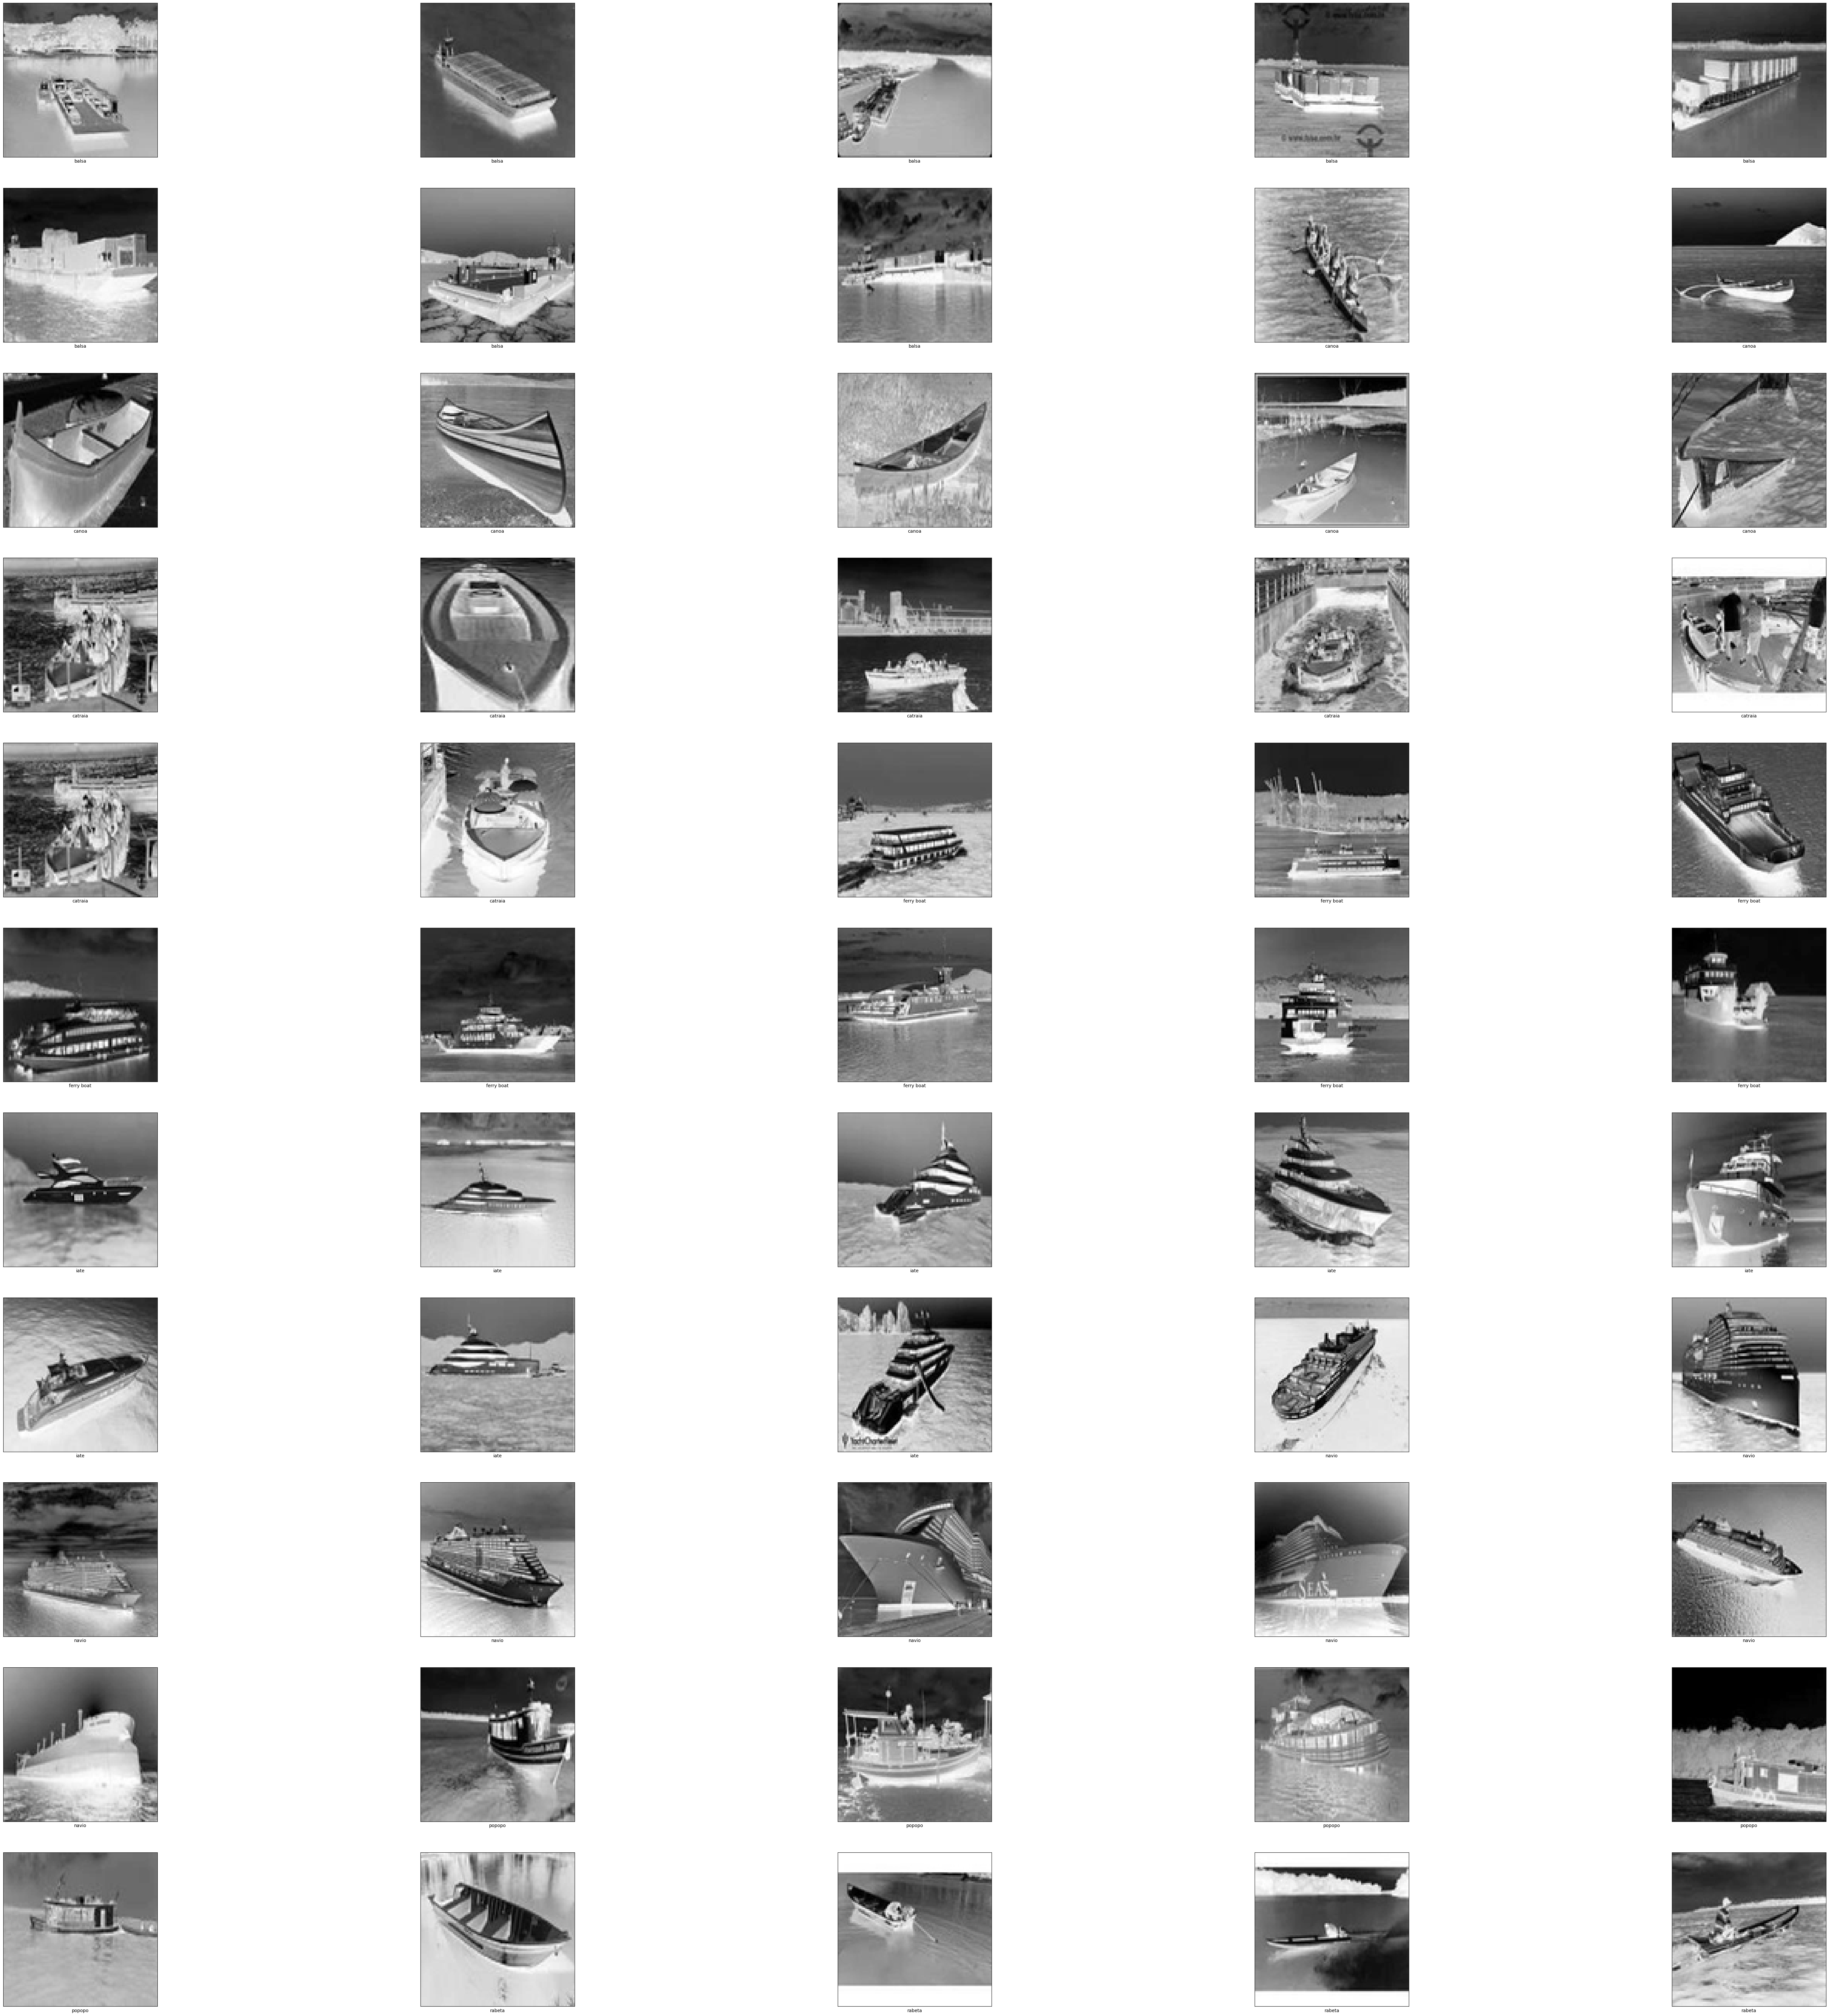

In [5]:

plt.show()
(train_images, train_labels) = load_image_dataset(r'C:\Users\gusta\OneDrive\Documentos\GitHub\DetectBoat-IA\treino', maxsize)
(test_images, test_labels) = load_image_dataset(r'C:\Users\gusta\OneDrive\Documentos\GitHub\DetectBoat-IA\teste', maxsize)
train_images = train_images / 255
test_images = test_images / 255
#EMBARALHAR AS IMAGENS
# Crie uma lista de índices na mesma ordem da lista original
indices = list(range(len(train_labels)))

# Embaralhe os índices
np.random.shuffle(indices)

# Use os índices embaralhados para embaralhar as duas listas
train_images = train_images[indices]
train_labels = train_labels[indices]

class_names = [ 'balsa', 'canoa', 'catraia','ferry boat','iate','navio','popopo','rabeta','veleiro','voadeira']
display_images(test_images, test_labels)

In [17]:
model = Sequential() # 28x28
model.add(tf.keras.layers.Flatten(input_shape=(100, 100)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=500)

Epoch 1/500


ValueError: in user code:

    File "c:\Users\gusta\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\gusta\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\gusta\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\gusta\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\gusta\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\gusta\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 45, 45, 1), found shape=(None, 100, 100)


C:\Users\gusta\AppData\Local\Temp\ipykernel_14648\2154439371.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(maxsize, PIL.Image.ANTIALIAS)


(850, 100, 100, 3)
Epoch 1/50
27/27 [==============================] - 31s 239ms/step - loss: 1.9975 - accuracy: 0.4059
Epoch 2/50
27/27 [==============================] - 6s 239ms/step - loss: 0.7977 - accuracy: 0.7506
Epoch 3/50
27/27 [==============================] - 7s 241ms/step - loss: 0.4449 - accuracy: 0.8847
Epoch 4/50
27/27 [==============================] - 6s 240ms/step - loss: 0.2713 - accuracy: 0.9494
Epoch 5/50
27/27 [==============================] - 6s 236ms/step - loss: 0.1575 - accuracy: 0.9741
Epoch 6/50
27/27 [==============================] - 6s 240ms/step - loss: 0.1039 - accuracy: 0.9859
Epoch 7/50
27/27 [==============================] - 7s 243ms/step - loss: 0.0777 - accuracy: 0.9929
Epoch 8/50
27/27 [==============================] - 6s 239ms/step - loss: 0.0630 - accuracy: 0.9941
Epoch 9/50
27/27 [==============================] - 6s 238ms/step - loss: 0.0512 - accuracy: 0.9941
Epoch 10/50
27/27 [==============================] - 6s 238ms/step - loss: 0.039

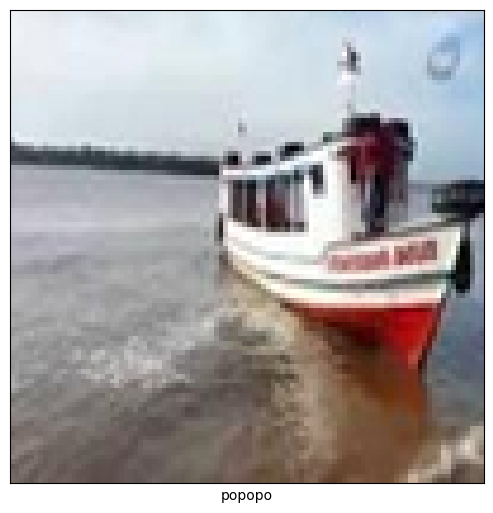

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re
import PIL
from tensorflow.keras.layers import Dense, Flatten
import random
from tensorflow.keras.models import Model

def jpeg_to_8_bit_greyscale(path, maxsize):
        img = PIL.Image.open(path)
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)

                if re.match('balsa.*', file):
                        images.append(img)
                        labels.append(0)

                elif re.match('canoa.*', file):
                        images.append(img)
                        labels.append(1)

                elif re.match('catraia.*', file):
                        images.append(img)
                        labels.append(2)

                elif re.match('ferry boat.*', file):
                        images.append(img)
                        labels.append(3)   

                elif re.match('iate.*', file):
                        images.append(img)
                        labels.append(4)                    

                elif re.match('navio.*', file):
                        images.append(img)
                        labels.append(5)

                elif re.match('popopo.*', file):
                        images.append(img)
                        labels.append(6)

                elif re.match('rabeta.*', file):
                        images.append(img)
                        labels.append(7)

                elif re.match('veleiro.*', file):
                        images.append(img)
                        labels.append(8)

                elif re.match('voadeira.*', file):
                        images.append(img)
                        labels.append(9)
                        
        return (np.asarray(images), np.asarray(labels))

maxsize = 100, 100
def display_images(images, labels):
        plt.figure(figsize=(80, 80))
        grid_size = min(55, len(images))
        for i in range(grid_size):
                plt.subplot(11, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])

plt.show()
(train_images, train_labels) = load_image_dataset(r'C:\Users\gusta\OneDrive\Documentos\GitHub\DetectBoat-IA\treino', maxsize)
(test_images, test_labels) = load_image_dataset(r'C:\Users\gusta\OneDrive\Documentos\GitHub\DetectBoat-IA\teste', maxsize)

#EMBARALHAR AS IMAGENS
# Crie uma lista de índices na mesma ordem da lista original
indices = list(range(len(train_labels)))
# Embaralhe os índices
random.shuffle(indices)
# Use os índices embaralhados para embaralhar as duas listas
train_images = train_images[indices]
train_labels = train_labels[indices]

class_names = [ 'balsa', 'canoa', 'catraia','ferry boat','iate','navio','popopo','rabeta','veleiro','voadeira']
display_images(test_images, test_labels)
train_images = train_images / 255
test_images = test_images / 255



base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet',input_shape=(100,100,3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
##################
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
#######################

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=keras.optimizers.Adam(0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

print(train_images.shape)
model.fit(train_images, train_labels, epochs=50)

In [15]:
a = model.summary()
a = str(a)
print(a[1])
#model.evaluate(test_images, test_labels)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 49, 49, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 49, 49, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [13]:
plt.show()
(train_images, train_labels) = load_image_dataset(r'C:\Users\gusta\OneDrive\Documentos\GitHub\DetectBoat-IA\treino', maxsize)
(test_images, test_labels) = load_image_dataset(r'C:\Users\gusta\OneDrive\Documentos\GitHub\DetectBoat-IA\teste', maxsize)

C:\Users\gusta\AppData\Local\Temp\ipykernel_14648\2154439371.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(maxsize, PIL.Image.ANTIALIAS)


In [16]:
model.predict(test_images)

1/1 [==============================] - 2s 2s/step


array([[1.8139834e-04, 7.7800971e-05, 3.1448828e-05, 2.6674508e-04,
        1.8990331e-05, 9.1565431e-07, 9.9930072e-01, 5.6521687e-05,
        4.4311205e-06, 6.1048107e-05]], dtype=float32)

Epoch 1/2
1/1 [==============================] - 1s 1s/step - loss: 84.4015 - accuracy: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 8ms/step - loss: 81.7001 - accuracy: 0.0000e+00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re
import PIL
from PIL import Image
import pickle 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
import random

In [ ]:
#Entrada dos dados
entrada = [1,2,3,4,5,6,7]

saida = [[2],
         [4],
         [6],
         [8],
         [10],
         [12],
         [14]]

In [15]:
saida[0][0]

2

In [16]:

model = Sequential() # 28x28
model.add(tf.keras.layers.Flatten(input_shape=(1,1)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

In [17]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
        loss='mse',
        metrics=['accuracy'])

model.fit(entrada, saida, epochs=200, )

Epoch 1/200
1/1 [==============================] - 1s 716ms/step - loss: 92.5962 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 88.3671 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 84.3752 - accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 80.6304 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 77.1908 - accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 74.0486 - accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 15ms/step - loss: 71.1570 - accuracy: 0.0000e+00
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 68.4019 - accuracy: 0.0000e+00
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 65.7143 - accuracy: 0.0000e+00
Epoch 10/200
1/1 [==============================] - 0s 13ms/step - loss: 63

In [18]:
#Importar bibliotecas
from time import time
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle 
t0 = time()

#Carregar o arquivo original
xx = pd.read_excel(r"C:\Users\gusta\OneDrive\Documentos\GitHub\IA-Afonso\Rede Neural Perceptron\dados2.xlsx",engine='openpyxl')

#Fazer uma copia dos dados de 'xx' para fazer a normalização dos dados
x = xx.copy()

#Normalizar os dados
grupo = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'STM(mm)','ITA(mm)','FORTA(mm)', 'TELES(mm)','ITA(cm)','STM(cm)']
for column in grupo: 
    x[column] = x[column]  / x[column].max()


entrada = np.array(x[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'STM(mm)','ITA(mm)','FORTA(mm)', 'TELES(mm)']],dtype='float32')
saida = np.array(x[['ITA(cm)','STM(cm)']],dtype='float32')
#Dados totais
namostra, nvariavel = entrada.shape 
nteste = int(0.1*namostra) + 1 
ntreino = namostra - nteste 
enttreino = entrada[0:ntreino,:] 
entteste = entrada[ntreino:namostra,:] 
saida_des = np.array(x[['ITA(cm)','STM(cm)']],dtype='float32') 
saida_des_treino = saida_des[0:ntreino] 
saida_teste = saida_des[ntreino:namostra] 


In [22]:
xx

,Mês/Ano,T1,T2,T3,T4,T5,T6,STM(mm),ITA(mm),FORTA(mm),TELES(mm),ITA(cm),STM(cm)
0,1985-01-01,24.27,23.84,24.37,25.20,25.785,28.47,331.25,284.62,384.02,466.75,577.29,342.61
1,1985-02-01,24.86,24.91,25.39,25.65,26.431,28.52,444.20,240.42,268.38,402.85,801.34,470.57
2,1985-03-01,26.47,25.90,26.00,25.93,26.322,27.94,373.64,215.87,308.61,417.53,818.45,482.68
3,1985-04-01,26.34,26.01,26.09,26.42,25.934,28.49,249.39,129.63,216.36,330.61,815.57,492.03
4,1985-05-01,25.24,26.03,26.30,26.95,26.457,28.78,383.28,191.79,136.13,175.59,768.32,522.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2022-08-01,24.64,24.90,25.99,26.39,27.340,29.11,43.79,75.55,20.36,44.72,570.19,632.19
452,2022-09-01,23.93,23.82,26.23,26.50,27.260,28.75,13.28,53.82,73.32,127.99,440.93,504.17
453,2022-10-01,23.72,25.46,25.56,26.60,27.160,28.67,76.08,171.46,236.87,200.14,258.65,307.65
454,2022-11-01,24.29,24.97,25.17,26.74,27.320,28.75,78.93,111.36,104.69,169.66,248.53,220.73


In [ ]:

def salvar_informacao(epoca,neuronio,taxa, rmse):
    try:
        df = pd.read_excel('resultados.xlsx')
    except:
        df = pd.DataFrame()

    new_data = pd.DataFrame({
        'epocas': [epoca],
        'neuronio': [neuronio],
        'taxa': [taxa],
        'RMSE':[rmse]
    })

    df = pd.concat([df, new_data], ignore_index=True)

    df.to_excel('result.xlsx', index=False)   

def salvar_modelo(nome):
    filename = f'modelos/{nome}.pkl'
    with open(filename, 'wb') as file:  
        pickle.dump(model, file)

#=============== CRIAÇÃO DO MODELO DA REDE ===============================
# Define o conjunto de hiperparâmetros para teste
neuronios_conj = range(1,20)
epocas = range(1000)
learning_rate = [0.01, 0.001]
result = 0.12
batch = range(2,128,2)

# Loop para testar cada combinação de hiperparâmetros
for neuronio in neuronios_conj:
    for epoca in epocas:
        for lr in learning_rate:
            for bat in batch:
                #Modelo da rede
                model = tf.keras.Sequential() 
                model.add(tf.keras.Input(10))
                model.add(tf.keras.layers.Dense(neuronio,
                            activation='sigmoid',
                            kernel_initializer='glorot_normal'))
                model.add(tf.keras.layers.Dense(2))

                # Compilador
                optim = tf.keras.optimizers.Adam(learning_rate=lr)
                model.compile(optimizer=optim, loss='mse', metrics=['accuracy'])

                #Treinamento
                model.fit(enttreino, saida_des_treino, epochs=epoca, batch_size=bat, verbose=True)

                # Resultados
                teste = model.predict(entteste)
                from sklearn.metrics import mean_squared_error 
                eqm = mean_squared_error(saida_teste,teste) 
                ermse = np.sqrt(eqm)
                print('o RMSE é: ',ermse, f"| Neuro: {neuronio}, epoca: {epoca}, taxa de aprendizagem: {lr}")

                #Verificar se o modelo é bom
                if ermse < result:
                    #salvar modelo
                    print("Salvando modelo...")
                    result = ermse
                    salvar_modelo(f"rmse-{ermse}-n{neuronio}-e{epoca}-t{lr}-b{bat}")
                else:
                    pass
                salvar_informacao(epoca,neuronio,lr,ermse)

input("FINALIZADO")
